# City cameras automatic event recoding

In [1]:
cd ../../../../Apps/Python/cams-rio

C:\Users\luisr\Desktop\Repositories\Apps\Python\cams-rio


In [2]:
from modules.cameras import Cameras

C:\Users\luisr\AppData\Roaming\Python\Python38\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


---
## Example usage

### Parameters

In [27]:
data_polygons = {
    'n': 5,
    'radius': 250.0,
    'n_frames': 45,
    'saveas': 'video',
    'workers': None,
    'urls': [{
        'url': 'mongo/Polygons/latest',
        'prefix': 'polygons', # ignored since query parameter is of type list
        'query': [{
            'query': {'label': 1.0},
            'prefix': 'polygons/flood-probability'
        }, {
            'query': {'waze_flood_status': 1},
            'prefix': 'polygons/waze/flood'
        }, {
            'query': {'lâmina_status': 1},
            'prefix': 'polygons/comando/lâmina'
        }, {
            'query': {'bolsão_status': 1},
            'prefix': 'polygons/comando/bolsão'
        }, {
            'query': {'alagamento_status': 1},
            'prefix': 'polygons/comando/alagamento'
        }, {
            'query': {'alagamento_enchente_status': 1},
            'prefix': 'polygons/comando/alagamento_enchente'
        }, {
            'query': {'enchente_status': 1},
            'prefix': 'polygons/comando/enchente'
        }],
    }],
}

data_comando = {
    'n': 3,
    'radius': 250.0,
    'n_frames': 45,
    'saveas': 'video',
    'workers': None,
    'urls': [{
        'url': 'comando/events',
        'prefix': 'comando', # ignored since query parameter is of type list
        'query': [{
            'query': {'pop_id': 33},
            'prefix': 'comando/lâmina'
        }, {
            'query': {'pop_id': 5},
            'prefix': 'comando/bolsão'
        }, {
            'query': {'pop_id': 31},
            'prefix': 'comando/alagamento'
        }, {
            'query': {'pop_id': 6},
            'prefix': 'comando/alagamento_enchente'
        }, {
            'query': {'pop_id': 32},
            'prefix': 'comando/enchente'
        }],
    }],
}

data_waze = {
    'urls': [{
        'url': 'waze/alerts',
        'query': [{
            'query': {'subtype': 'HAZARD_WEATHER_FLOOD'},
            'prefix': 'waze/flood',
        }],
        'prefix': 'waze',
    }],
    'n': 3,
    'radius': 250.0,
    'n_frames': 45,
    'saveas': 'video',
    'workers': None,
}

event_points_config = {
    'cameras': {'_id': 'Codigo', 'coords': ['Longitude', 'Latitude']},
    'comando/events': {'_id': 'id', 'coords': ['longitude', 'latitude']},
    'waze/alerts': {'_id': 'uuid', 'coords': ['longitude', 'latitude']},
    'mongo/Polygons/latest': {'_id': 'cluster_id', 'coords': ['lng_centroid', 'lat_centroid']},
}

url_default = lambda url: {**url, **event_points_config[url['url']]}

data_polygons['urls'] = list(map(url_default, data_polygons['urls']))
data_comando['urls'] = list(map(url_default, data_comando['urls']))
data_waze['urls'] = list(map(url_default, data_waze['urls']))

### Cameras instance

In [29]:
data = data_polygons

cams = Cameras(data['urls'])

### Instance triggered cameras

In [30]:
triggered = cams.triggered(n=data['n'], radius=data['radius'])

triggered.head(10)

,Codigo,distance,camera_position,prefix,_id,path


### Url triggered cameras

##### Pass down single dict of url document as parameter

In [34]:
triggered = cams.triggered(
    data['urls'][0],
    n=data['n'],
    radius=data['radius']
)

triggered.head()

,Codigo,distance,camera_position,prefix,_id,path
0,555,120.006019,1,comando/bolsão,92650,comando/bolsão/92650
1,1567,209.120854,2,comando/bolsão,92650,comando/bolsão/92650


### Multiple urls triggering

In [39]:
triggered = cams.triggered(
    data_comando['urls'] + data_waze['urls'],
    n=data_comando['n'],
    radius=data_comando['radius']
)

triggered.head()

,Codigo,distance,camera_position,prefix,_id,path
0,555,120.006019,1,comando/bolsão,92650,comando/bolsão/92650
1,1567,209.120854,2,comando/bolsão,92650,comando/bolsão/92650


### Exploratory Data Analysis

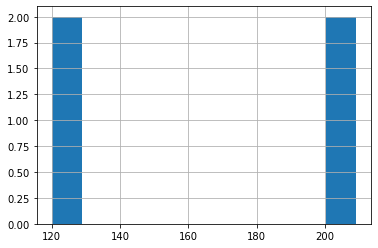

In [37]:
ax = triggered['distance'].hist()